In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) ## 모든 열을 출력
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# plt.rc('font', family='NanumBarunGothic') 
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use(['ggplot'])

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
custom = pd.read_csv('../data/cs_data.csv', low_memory = False)

## EDA

In [4]:
# HTS 접속 비중이 높은 고객은 평균 거래액, 거래종목수, 접속일 모두 높음 -> 주식에 관심이 높다고 할 수 있음
print(custom.groupby('PLATFORM_HTS')['BUY_ITM_CNT_avg'].agg('mean'),
    custom.groupby('PLATFORM_HTS')['TRANSACTION_AMT_sum'].agg('mean'),
    custom.groupby('PLATFORM_HTS')['HTS_DYS_sum'].agg('mean'),  sep = '\n')

PLATFORM_HTS
0     3.929652
1    14.021429
Name: BUY_ITM_CNT_avg, dtype: float64
PLATFORM_HTS
0    1.788277e+08
1    8.425041e+08
Name: TRANSACTION_AMT_sum, dtype: float64
PLATFORM_HTS
0     1.764612
1    68.158482
Name: HTS_DYS_sum, dtype: float64


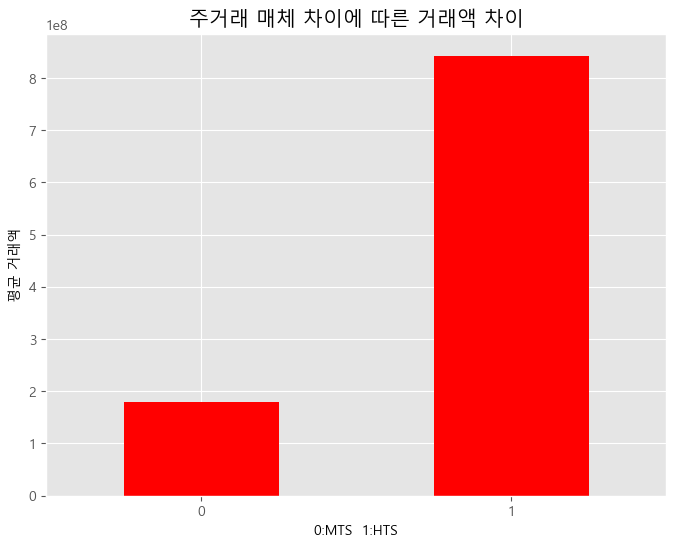

In [5]:
result = custom.groupby('PLATFORM_HTS')['TRANSACTION_AMT_sum'].agg('mean')
plt.figure(figsize=(8, 6))
result.plot(kind='bar', color='red')
plt.xlabel('0:MTS  1:HTS')
plt.ylabel('평균 거래액')
plt.title('주거래 매체 차이에 따른 거래액 차이')
plt.xticks(rotation=0)
plt.show()

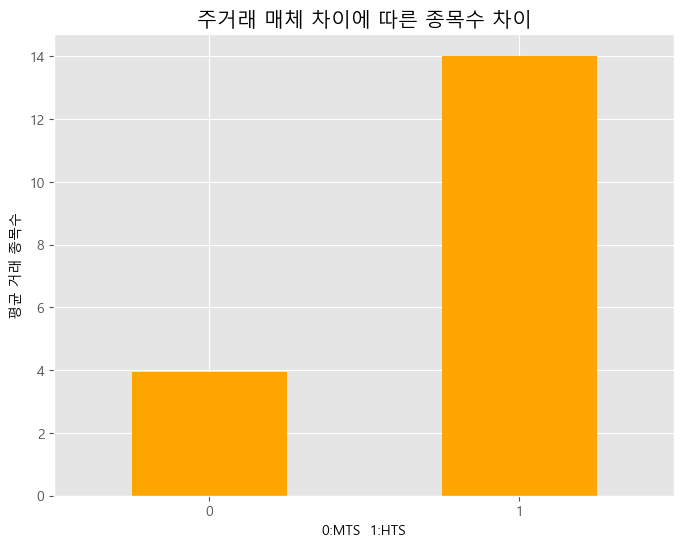

In [6]:
result = custom.groupby('PLATFORM_HTS')['BUY_ITM_CNT_avg'].agg('mean')
plt.figure(figsize=(8, 6))
result.plot(kind='bar', color='orange')
plt.xlabel('0:MTS  1:HTS')
plt.ylabel('평균 거래 종목수')
plt.title('주거래 매체 차이에 따른 종목수 차이')
plt.xticks(rotation=0)
plt.show()

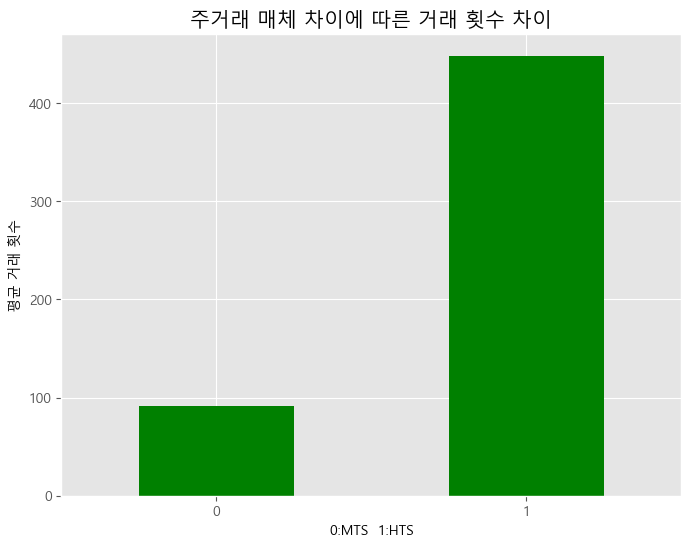

In [7]:
result = custom.groupby('PLATFORM_HTS')['TRANSACTION_CNT'].agg('mean')
plt.figure(figsize=(8, 6))
result.plot(kind='bar', color='green')
plt.xlabel('0:MTS  1:HTS')
plt.ylabel('평균 거래 횟수')
plt.title('주거래 매체 차이에 따른 거래 횟수 차이')
plt.xticks(rotation=0)
plt.show()

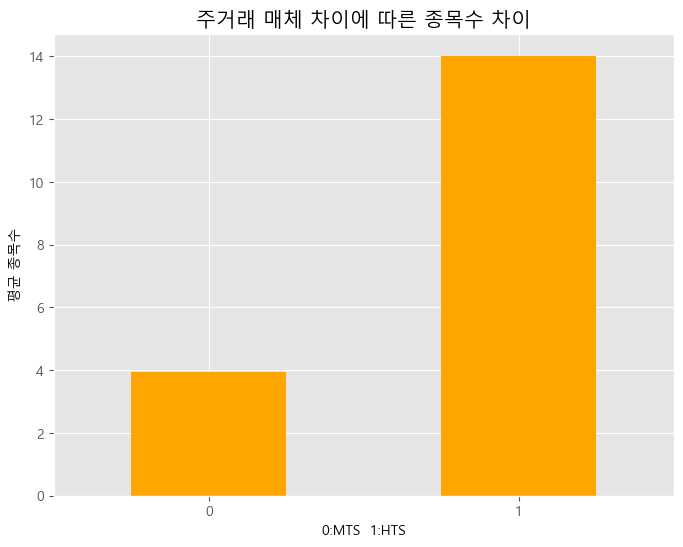

In [8]:
result = custom.groupby('PLATFORM_HTS')['BUY_ITM_CNT_avg'].agg('mean')
plt.figure(figsize=(8, 6))
result.plot(kind='bar', color='orange')
plt.xlabel('0:MTS  1:HTS')
plt.ylabel('평균 종목수')
plt.title('주거래 매체 차이에 따른 종목수 차이')
plt.xticks(rotation=0)
plt.show()

In [9]:
# 관리사원이 있는 경우 평균 거래액, 거래종목수, 접속일 모두 높음 -> 주식에 관심이 높다고 할 수 있음
print(custom.groupby('MT_EP_EXIST_YN')['BUY_ITM_CNT_avg'].agg('mean'),
    custom.groupby('MT_EP_EXIST_YN')['TRANSACTION_AMT_sum'].agg('mean'),
    custom.groupby('MT_EP_EXIST_YN')['HTS_DYS_sum'].agg('mean'), sep = '\n')

MT_EP_EXIST_YN
N    4.391376
Y    6.026052
Name: BUY_ITM_CNT_avg, dtype: float64
MT_EP_EXIST_YN
N    1.838947e+08
Y    5.143169e+08
Name: TRANSACTION_AMT_sum, dtype: float64
MT_EP_EXIST_YN
N     5.287367
Y    11.767570
Name: HTS_DYS_sum, dtype: float64


In [10]:
print(custom['TRANSACTION_CNT'].corr(custom['BUY_ITM_CNT_avg']), # 거래횟수, 종목갯수의 상관관계는 0.80
      custom['TRANSACTION_CNT'].corr(custom['TRANSACTION_AMT_sum']), # 거래횟수와 거래금액의 상관관계는 0.52
      custom['TRANSACTION_CNT'].corr(custom['CONN_DYS_sum']), # 거래횟수와 거래일자의 상관관계는 0.24
      custom['BUY_ITM_CNT_avg'].corr(custom['TRANSACTION_AMT_sum']), # 종목갯수와 거래 금액의 상관관계는 0.45
      custom['BUY_ITM_CNT_avg'].corr(custom['CONN_DYS_sum']), # 종목갯수와 거래일자의 상관관계는 0.32
      custom['TRANSACTION_AMT_sum'].corr(custom['CONN_DYS_sum']), sep = '\n') # 거래금액과 거래일자의 상관관계는 0.20

0.8088324279777828
0.5244383628043935
0.24397201421961787
0.4564001966080384
0.32067263321242245
0.20285972463205607


<Axes: ylabel='Frequency'>

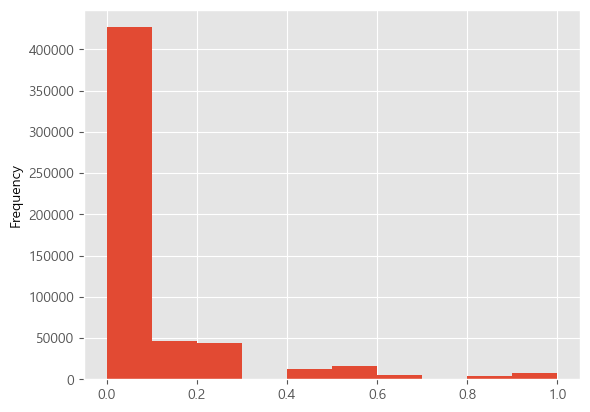

In [11]:
custom['DAY_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

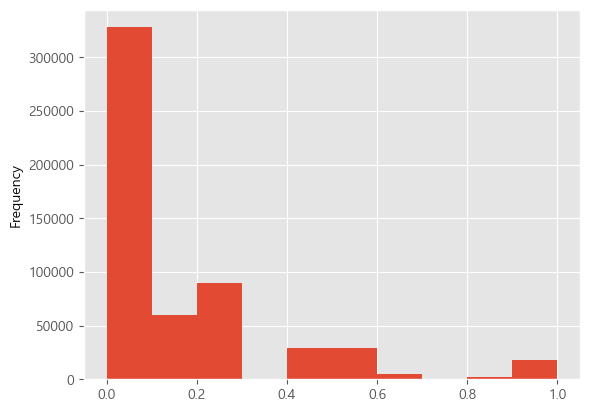

In [12]:
custom['SWING_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

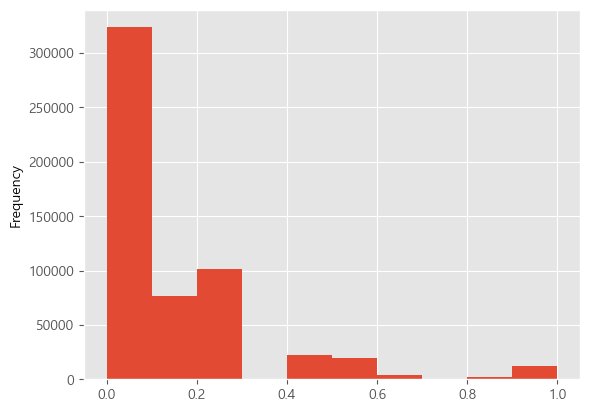

In [13]:
custom['MONTHS_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

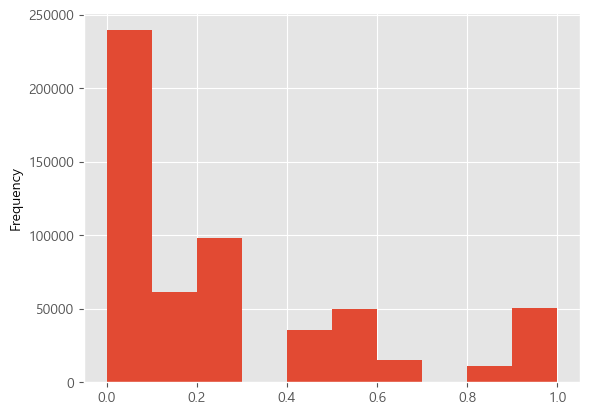

In [14]:
custom['MID_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

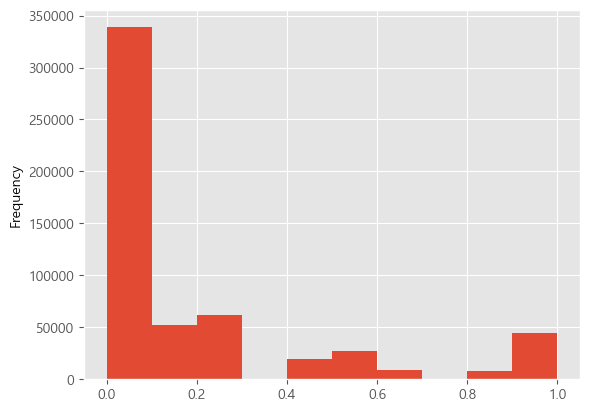

In [15]:
custom['HLD_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

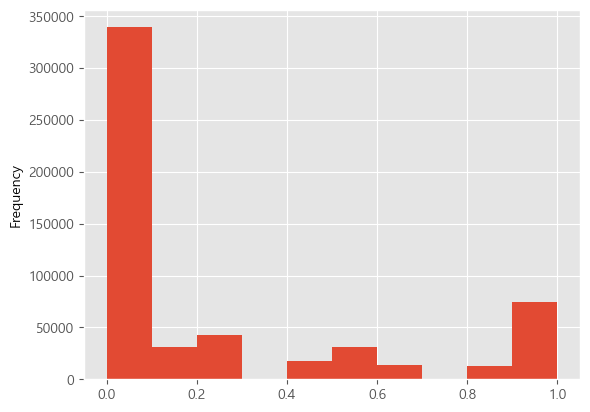

In [16]:
custom['YEARS_TR_RATIO'].plot.hist()

In [17]:
custom[(custom['DAY_TR_RATIO'] + custom['SWING_TR_RATIO'] + custom['MONTHS_TR_RATIO'] + custom['MID_TR_RATIO'] + custom['HLD_TR_RATIO'] + custom['YEARS_TR_RATIO']) > 1.1][[
'DAY_TR_RATIO',
'SWING_TR_RATIO',
'MONTHS_TR_RATIO',
'MID_TR_RATIO',
'HLD_TR_RATIO',
'YEARS_TR_RATIO',
]]

,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO
300,0.2,0.4,0.3,0.1,0.1,0.0
314,0.1,0.2,0.3,0.3,0.1,0.1
703,0.2,0.2,0.2,0.3,0.1,0.1
1195,0.2,0.2,0.2,0.4,0.1,0.1
3928,0.1,0.2,0.4,0.2,0.1,0.1
...,...,...,...,...,...,...
791672,0.4,0.2,0.3,0.1,0.1,0.0
794001,0.1,0.1,0.0,0.2,0.2,0.6
794254,0.3,0.1,0.2,0.3,0.1,0.1
796373,0.1,0.1,0.2,0.4,0.2,0.2


In [18]:
custom[['DAY_TR_RATIO',
'SWING_TR_RATIO',
'MONTHS_TR_RATIO',
'MID_TR_RATIO',
'HLD_TR_RATIO',
'YEARS_TR_RATIO']]

,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.4,0.1,0.1,0.0,0.0
3,0.4,0.3,0.2,0.0,0.0,0.0
4,0.2,0.6,0.2,0.0,0.0,0.0
...,...,...,...,...,...,...
803303,0.0,0.0,0.0,0.0,0.1,0.9
803304,0.0,0.1,0.3,0.3,0.2,0.1
803305,0.1,0.1,0.3,0.3,0.1,0.1
803306,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
custom[['DAY_TR_RATIO',
'SWING_TR_RATIO',
'MONTHS_TR_RATIO',
'MID_TR_RATIO',
'HLD_TR_RATIO',
'YEARS_TR_RATIO']]

,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.4,0.1,0.1,0.0,0.0
3,0.4,0.3,0.2,0.0,0.0,0.0
4,0.2,0.6,0.2,0.0,0.0,0.0
...,...,...,...,...,...,...
803303,0.0,0.0,0.0,0.0,0.1,0.9
803304,0.0,0.1,0.3,0.3,0.2,0.1
803305,0.1,0.1,0.3,0.3,0.1,0.1
803306,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 국내 주식으로 수익을 기록한 고객 비율
print(custom[custom['DMST_PCHS_EVAL_sum'] > 0].shape[0] / custom.shape[0])
# 국내 주식으로 손실을 기록한 고객 비율
print(custom[custom['DMST_PCHS_EVAL_sum'] < 0].shape[0] / custom.shape[0])

0.10026291285534315
0.8409949857339899


In [21]:
# 해외 주식으로 수익을 기록한 고객 비율
print(custom[custom['OVST_PCHS_EVAL_sum'] > 0].shape[0] / custom.shape[0])
# 해외 주식으로 손실을 기록한 고객 비율
print(custom[custom['OVST_PCHS_EVAL_sum'] < 0].shape[0] / custom.shape[0])

0.04000956046746702
0.17874215120476827


In [22]:
# 국내 + 해외 합쳐도 비슷함
# 해외 거래를 경험한 고객은 전체 고객 중 21%
custom[custom['PCHS_EVAL_sum'] > 0].shape[0] / custom.shape[0]

0.10341238976830805

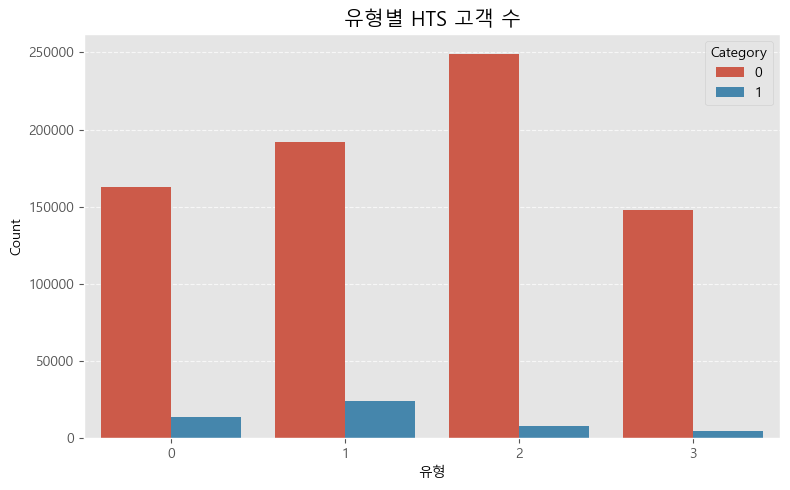

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(x='labels', hue='PLATFORM_HTS', data=custom)

plt.xlabel('유형')
plt.ylabel('Count')
plt.title('유형별 HTS 고객 수')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [106]:
# 자본 수준 기준
# 주거래매체 비율 조정
# 항목 변경
# 가중치 변경

## 군집분석

In [23]:
cc = custom[['CAPITAL_degree','STOCK_INTEREST_degree','DISPERTION_degree','TIMELINE_degree','DMST_OVST_degree']]

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 97)
clusters = kmeans.fit(cc)
# cc['cluster'] = clusters.labels_
custom['labels'] = clusters.labels_

In [25]:
custom['labels'].value_counts()

2    257515
1    216300
0    176905
3    152588
Name: labels, dtype: int64

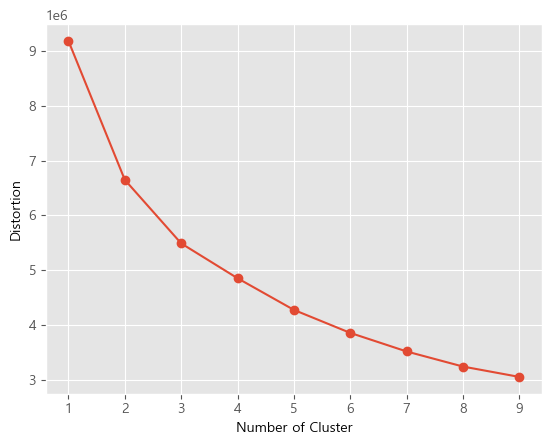

In [26]:
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 10):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()
    
visualize_elbowmethod(cc)

In [27]:
# from sklearn.metrics import silhouette_score

# def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
#     clusters_range = range(2,15)
#     results = []

#     for i in clusters_range:
#         clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
#         cluster_labels = clusterer.fit_predict(data)
#         silhouette_avg = silhouette_score(data, cluster_labels)
#         results.append([i, silhouette_avg])

#     result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
#     pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

#     plt.figure()
#     sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
#     plt.tight_layout()
#     plt.show()
    
# visualize_silhouette_layer(cc)

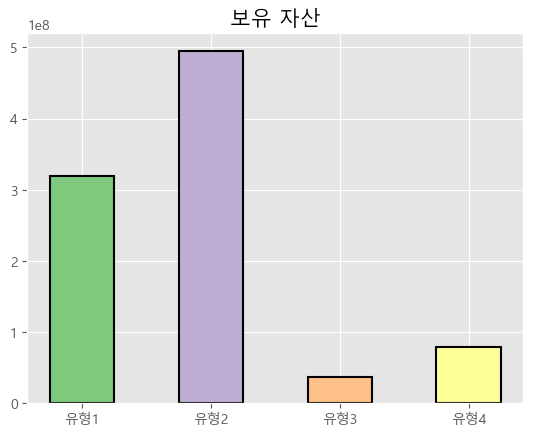

In [28]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(
    ['유형1', '유형2', '유형3', '유형4'], 
        custom.groupby('labels')['ASSET_sum'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('보유 자산', fontsize=15)
plt.show()

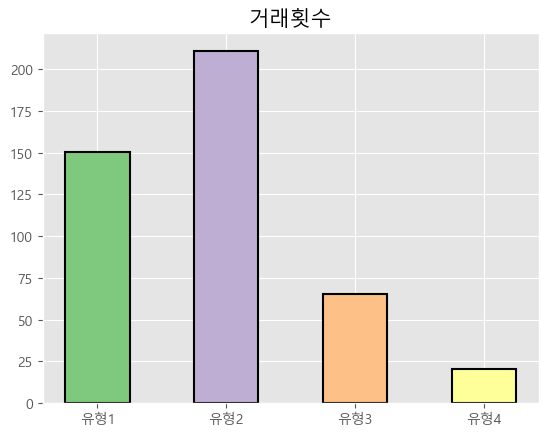

In [29]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(
    ['유형1', '유형2', '유형3', '유형4'], 
        custom.groupby('labels')['TRANSACTION_CNT'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('거래횟수', fontsize=15)
plt.show()

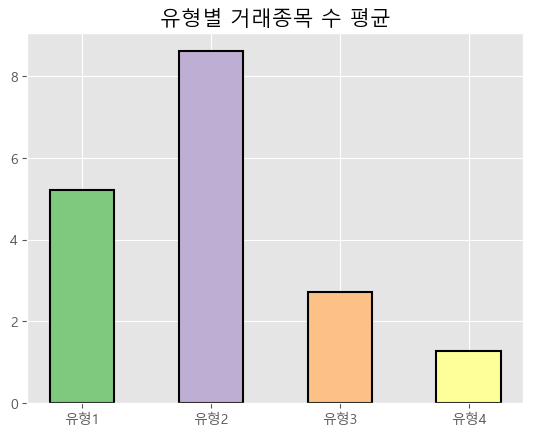

In [31]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(
    ['유형1', '유형2', '유형3', '유형4'], 
        custom.groupby('labels')['BUY_ITM_CNT_avg'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('유형별 거래종목 수 평균', fontsize=15)
plt.show()

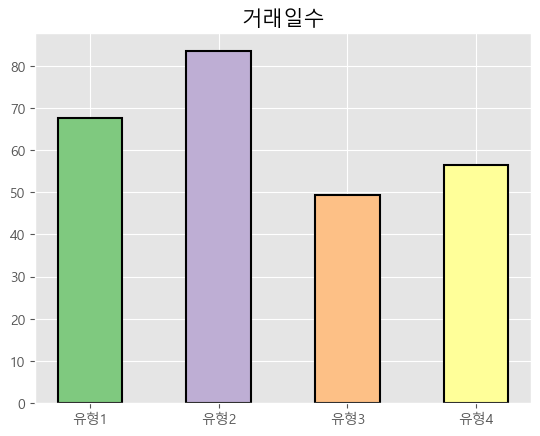

In [32]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(
    ['유형1', '유형2', '유형3', '유형4'], 
        custom.groupby('labels')['CONN_DYS_sum'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('거래일수', fontsize=15)
plt.show()

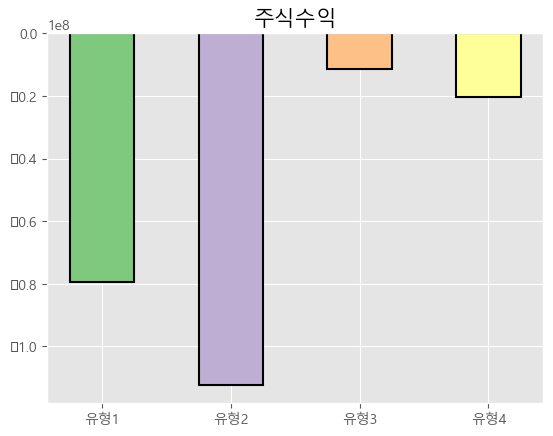

In [33]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(
    ['유형1', '유형2', '유형3', '유형4'], 
        custom.groupby('labels')['PCHS_EVAL_sum'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('주식수익', fontsize=15)
plt.show()

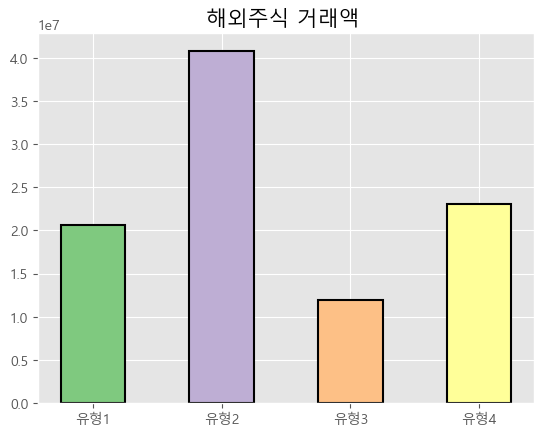

In [34]:
# 차이가 없어서 비중으로 가야할듯?
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(
    ['유형1', '유형2', '유형3', '유형4'], 
        custom.groupby('labels')['OVST_AST_PCHS_sum'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('해외주식 거래액 ', fontsize=15)
plt.show()

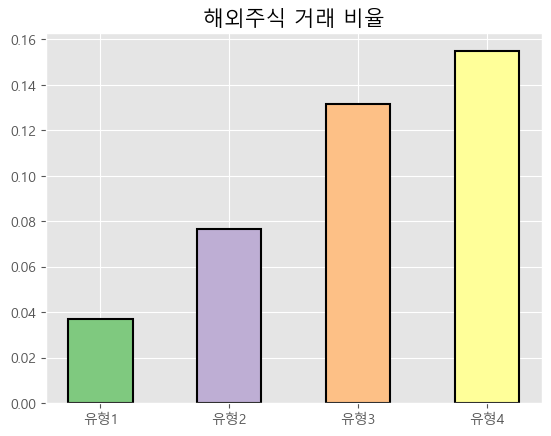

In [35]:
# 차이가 없어서 비중으로 가야할듯
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['유형1', '유형2', '유형3', '유형4'], 
        custom.groupby('labels')['OVST_AST_ratio'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('해외주식 거래 비율', fontsize=15)
plt.show()

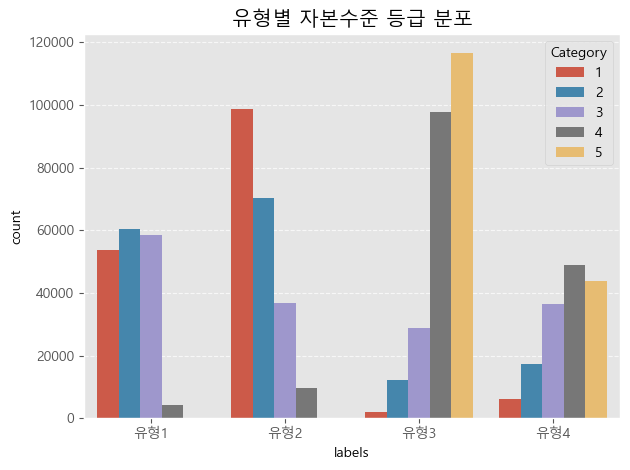

In [36]:
sns.countplot(x='labels', hue='CAPITAL_degree', data=custom)
plt.title('유형별 자본수준 등급 분포')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=[0, 1, 2, 3],labels = ['유형1', '유형2', '유형3', '유형4'])
plt.tight_layout()
plt.show()

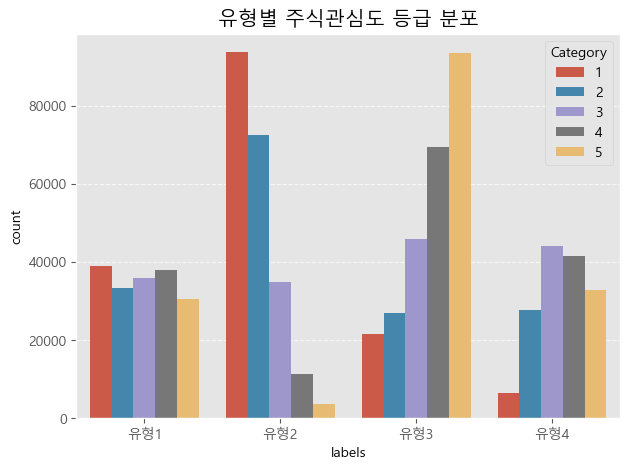

In [37]:
sns.countplot(x='labels', hue='STOCK_INTEREST_degree', data=custom)
plt.title('유형별 주식관심도 등급 분포')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3],labels = ['유형1', '유형2', '유형3', '유형4'])
plt.show()

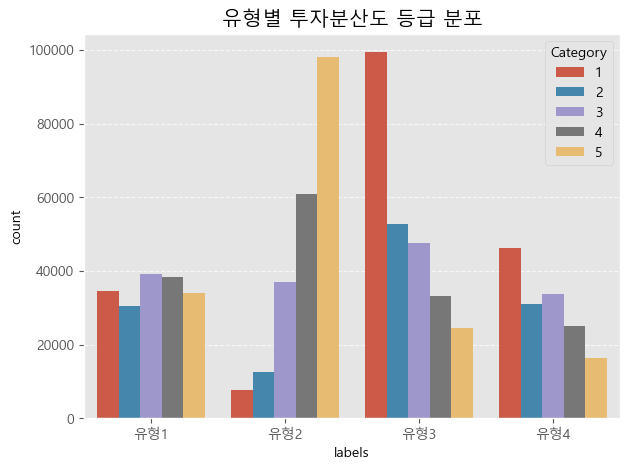

In [38]:
sns.countplot(x='labels', hue='DISPERTION_degree', data=custom)
plt.title('유형별 투자분산도 등급 분포')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3],labels = ['유형1', '유형2', '유형3', '유형4'])
plt.show()

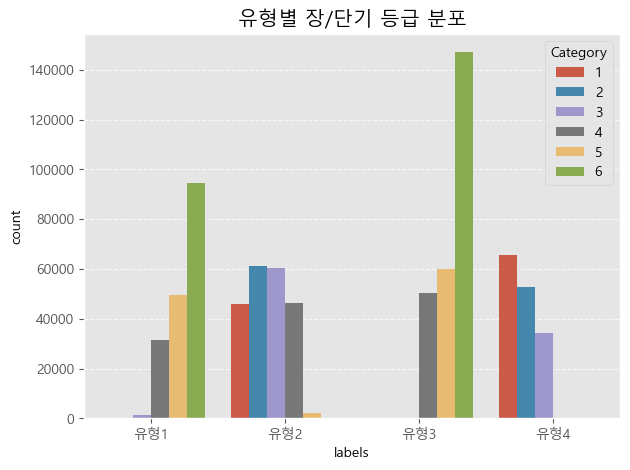

In [39]:
sns.countplot(x='labels', hue='TIMELINE_degree', data=custom)
plt.title('유형별 장/단기 등급 분포')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3],labels = ['유형1', '유형2', '유형3', '유형4'])
plt.show()

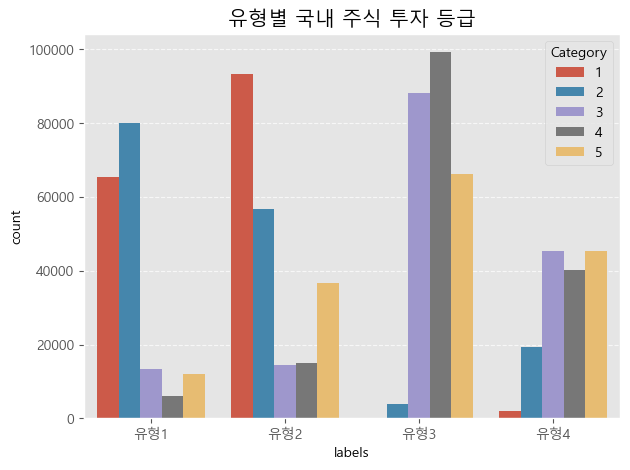

In [40]:
sns.countplot(x='labels', hue='DMST_OVST_degree', data=custom)
plt.title('유형별 국내 주식 투자 등급')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3],labels = ['유형1', '유형2', '유형3', '유형4'])
plt.show()

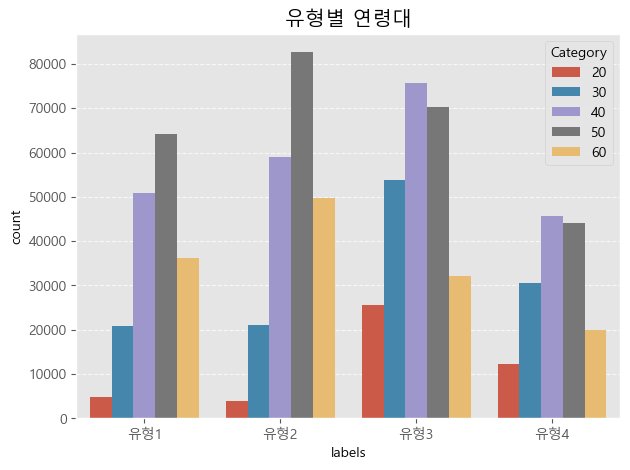

In [41]:
sns.countplot(x='labels', hue='AGE_TCD', data=custom)
plt.title('유형별 연령대')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3],labels = ['유형1', '유형2', '유형3', '유형4'])
plt.show()

In [42]:
# 유형 1은 주식에 관심도, 자본도 거래횟수도 적음, 몇가지 종목에 넣어놓고 묵혀두는 유형, 젊은 층이 많이 분포 -> 주식에 대한 관심을 키워야 할듯, 미래고객
# 유형 2는 경제력도, 관심도, 수익률 모두 높음, 몇가지 종목을 정하고 장기적으토 투자하는 유형 -> 주식 전문가, 관련 뉴스 추천
# 유형 3은 돈도 많고 관심도 높으나 수익률이 낮음 -> 수익률 높은 종목추천, 헤비유저
# 유형 4는 해외주식에 가장 높은 관심, 적은 종목에 자주 거래 하는듯 -> 소액, 단기 투자 유형, 간편거래 시스템 추천
# 유형 5는 투자에 관심 낮음, 자본수준은 보통, 장기투자 but 수익률은 낮음 -> 특징이 없는듯...

In [43]:
custom.to_csv('../data/cs_data.csv')